In [1]:
import sys
sys.path.append('../')
import os
os.environ['DATABASE_URL'] = DATABASE_URL = 'sqlite:////Users/nickhilton/kaggle/march_madness/databases/terrapin.db'
DATABASE = os.environ['DATABASE_URL'].split('sqlite:///')[1]

import pandas as pd
from helpers import sqlite_to_df
from matplotlib import pyplot as plt

In [2]:
# Regular Imports
from datetime import datetime
import pandas as pd
import numpy as np
import warnings

# Matplotlib imports 
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import set_matplotlib_formats
import matplotlib

# Formatters for matplotlib
from matplotlib.ticker import StrMethodFormatter



# Options
pd.set_option('display.max_rows',200)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.notebook_repr_html', True)


%matplotlib inline
plt.rcParams['figure.dpi'] = 100
set_matplotlib_formats('pdf', 'png')
matplotlib.rcParams['figure.figsize'] = (4.5,2.7)
matplotlib.rcParams["legend.fontsize"] = 7
matplotlib.rcParams['font.size'] = 7

/var/folders/51/f34q3vy907ggv81__1wckfyc0000gn/T/ipykernel_45194/3107368209.py:26: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'png')


In [3]:
# Formatters and Display Functions
IT_FORMATTER = StrMethodFormatter('{x:,.0f}')

def get_float_formatter(n=1):
    return StrMethodFormatter(f'{{x:.{n}f}}')
FLOAT_FORMATTER = get_float_formatter()

INT_FORMATTER = StrMethodFormatter("{x:,g}")
INT_FORMAT_STRING = '{:,g}'

PERCENT_FORMATTER = StrMethodFormatter("{x:,.0%}")
PERCENT_FORMAT_STRING = '{:,.1%}'

In [4]:
# Get evaluations into a df for analysis

df = sqlite_to_df('SELECT * from evaluations').dropna()

In [5]:
df.head()

,id,rating,d,k,seed,link,FGP,R,FGP3,season,tournament_loss,correct_predictions
0,1.0_25_-35_N_1200_15_-10_2010_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2010,0.157452,0.761905
1,1.0_25_-35_N_1200_15_-10_2011_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2011,0.147716,0.777778
2,1.0_25_-35_N_1200_15_-10_2012_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2012,0.143571,0.857143
3,1.0_25_-35_N_1200_15_-10_2013_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2013,0.160570,0.777778
4,1.0_25_-35_N_1200_15_-10_2014_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2014,0.146794,0.761905


In [6]:
df.columns

Index(['id', 'rating', 'd', 'k', 'seed', 'link', 'FGP', 'R', 'FGP3', 'season',
       'tournament_loss', 'correct_predictions'],
      dtype='object')

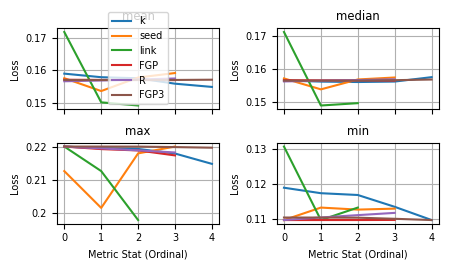

In [7]:
# Subplots
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

# Resize to accomodate more figures
matplotlib.rcParams['figure.figsize'] = (19,15.4)

stats = ['mean', 'median', 'max', 'min']
params = ['k', 'seed', 'link', 'FGP', 'R', 'FGP3']

for ix, stat in enumerate(stats):
    ax = axes[ix]
    
    for col in params:
        stats_df = df.groupby(by=[col]).tournament_loss.agg(stats)
        ax.plot(stats_df[stat].sort_index().reset_index(drop=True), label=col)
        
    plt.draw()

    ax.set_title(stat)

    ax.set_xlabel("Metric Stat (Ordinal)")
    ax.set_ylabel("Loss")
    
    ax.xaxis.set_major_formatter(INT_FORMATTER)
    ax.yaxis.set_major_formatter(INT_FORMATTER)

#     # Only show some tick labels
#     xticks = list(ax.get_xticks())
#     xlabels = list(ax.get_xticklabels())
#     n = 5
#     ax.set_xticks(xticks[::n])
#     ax.set_xticklabels(xlabels[::n])
#     ax2.set_xticks(xticks[::n])
#     ax2.set_xticklabels(xlabels[::n])
    
#     ax.tick_params(axis='x', rotation=45)
    
#     # Now plot on secondary axis
#     ax2.plot(df["death_rate"], alpha=0.4, c='g', linestyle='dashed', label='death_rate')
#     ax2.plot(df["recovered_rate"], alpha=0.4, c='r', linestyle='dashed', label='recovered_rate')

    # Show grid on major axis
    ax.grid()
    
#     # Show secondary legend
#     if ix == 1:
#         ax2.legend(loc=0)
    if ix == 0:
        ax.legend(loc=0)
    
    # Get rid of x labels if chart in upper area
    if ix < 2:
        ax.set_xticklabels([])
#         ax2.set_xticklabels([])
        ax.set_xlabel("")
        
#     # Show horizontal line
#     ax2.axhline(y=0.01, c='black', alpha = 0.9)
    
#     # Set axes limits
#     ax2.set_ylim(0,0.05)
    
    # Add spacing between subplots to show axes more clearly
    plt.tight_layout()


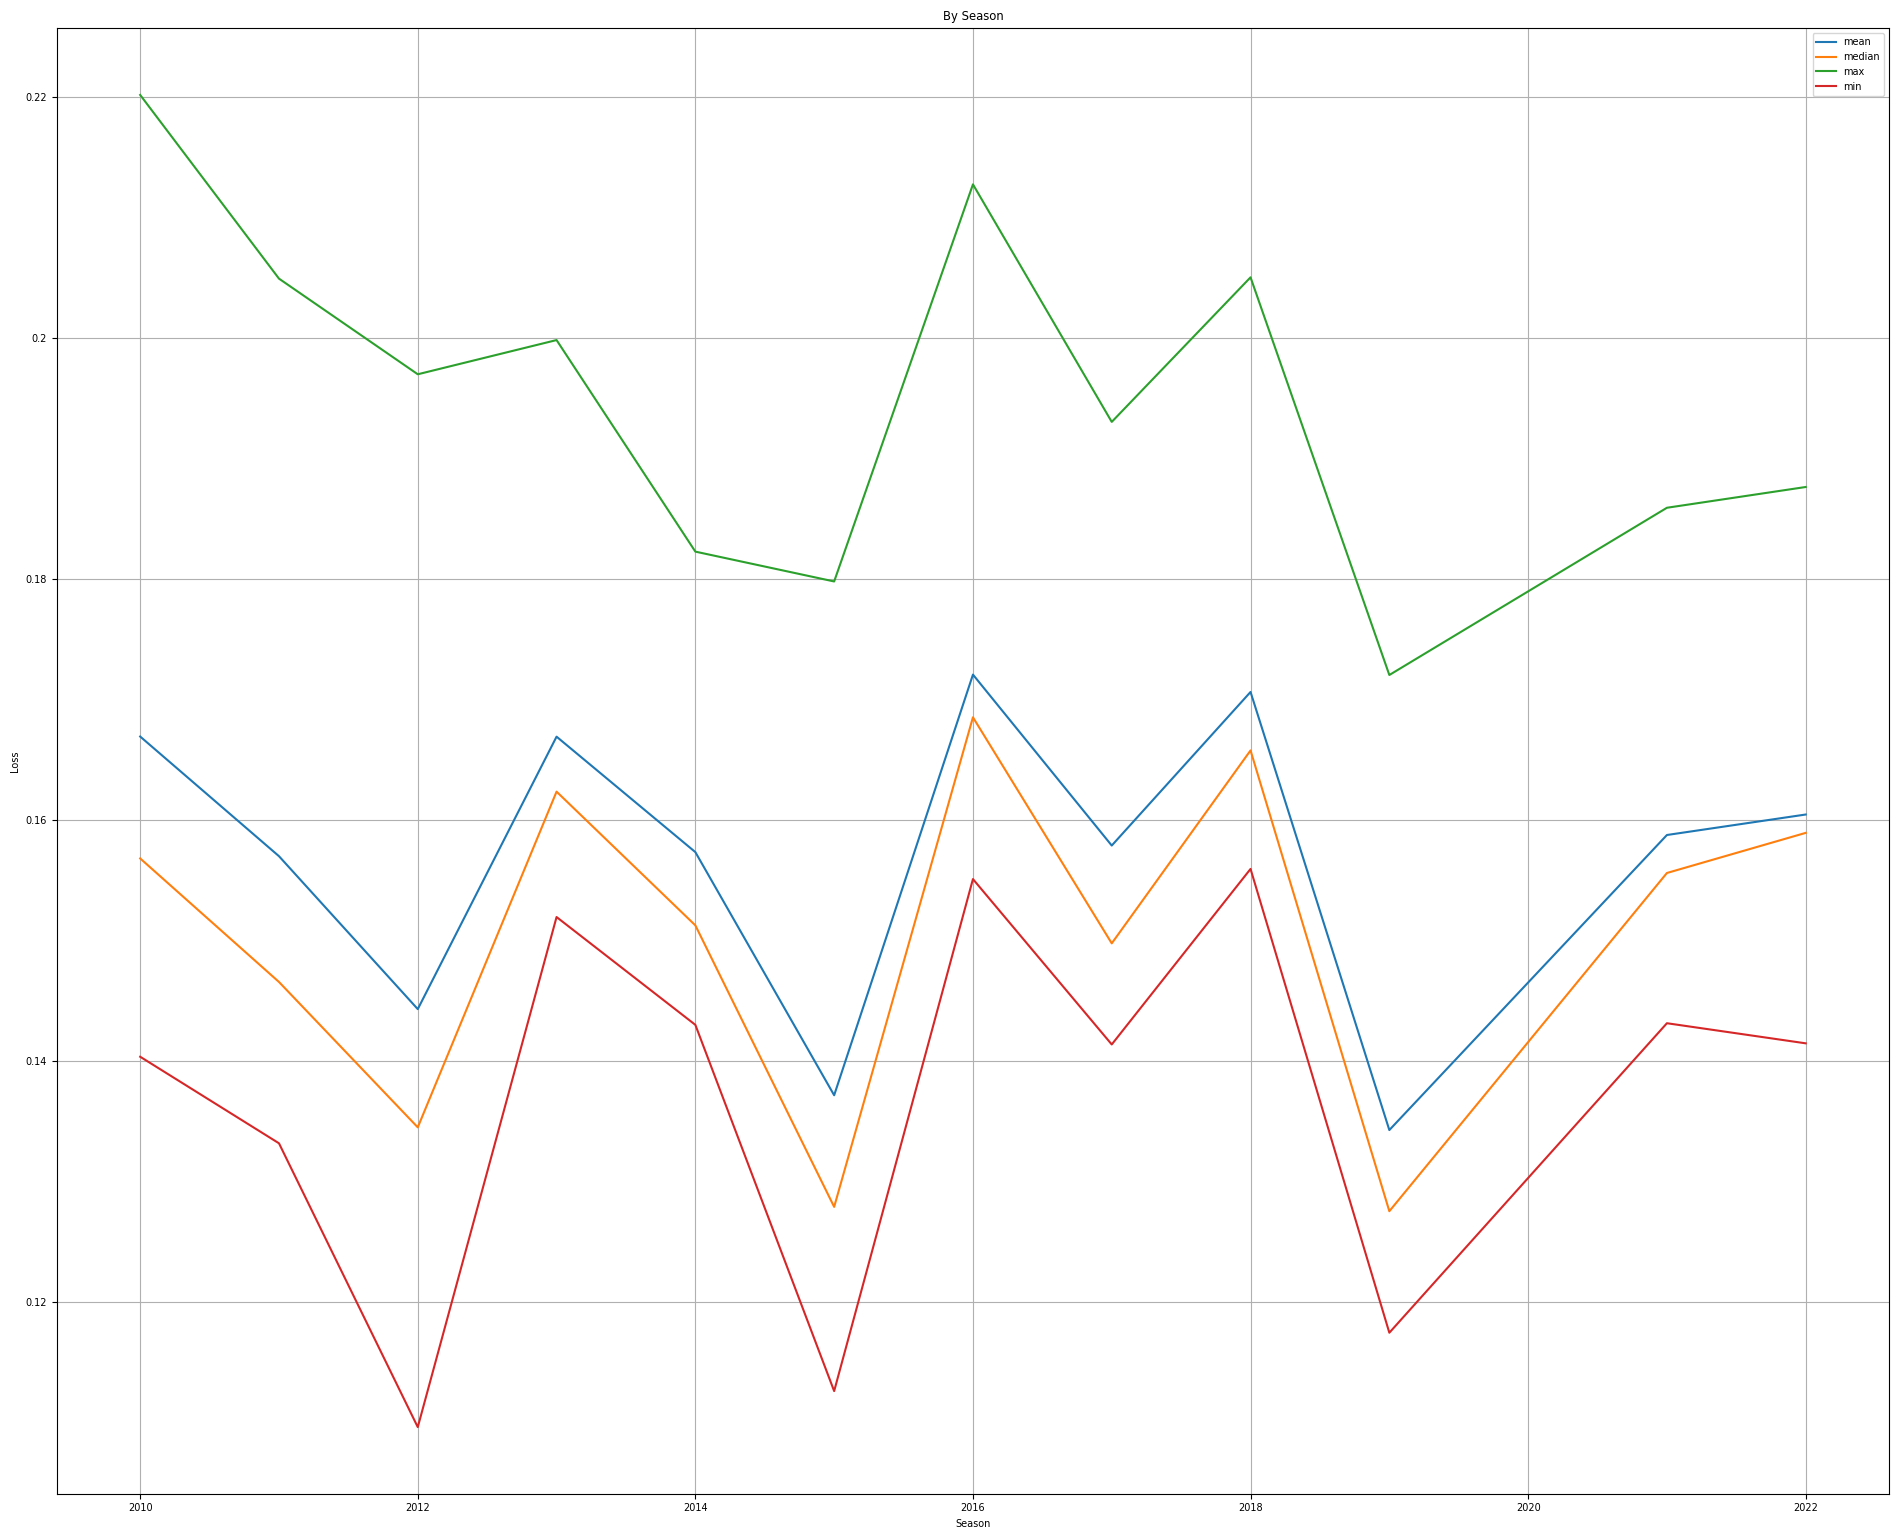

In [8]:
# Subplots
fig, ax = plt.subplots(1,1)
axes = axes.flatten()

# Resize to accomodate more figures
matplotlib.rcParams['figure.figsize'] = (19,15.4)

stats = ['mean', 'median', 'max', 'min']
years = list(range(2003,2023))

stats_df = df.groupby(by="season").tournament_loss.agg(stats)

for ix, stat in enumerate(stats):
    
    ax.plot(stats_df[stat].sort_index(), label=stat)
        
#     plt.draw()

ax.set_title("By Season")

ax.set_xlabel("Season")
ax.set_ylabel("Loss")

#     ax.xaxis.set_major_formatter(INT_FORMATTER)
ax.yaxis.set_major_formatter(INT_FORMATTER)

#     # Only show some tick labels
# xticks = list(ax.get_xticks())
# xlabels = list(ax.get_xticklabels())
# n = 2
# ax.set_xticks(xticks[::n])
# ax.set_xticklabels(xlabels[::n])
#     ax2.set_xticks(xticks[::n])
#     ax2.set_xticklabels(xlabels[::n])

#     ax.tick_params(axis='x', rotation=45)

#     # Now plot on secondary axis
#     ax2.plot(df["death_rate"], alpha=0.4, c='g', linestyle='dashed', label='death_rate')
#     ax2.plot(df["recovered_rate"], alpha=0.4, c='r', linestyle='dashed', label='recovered_rate')

# Show grid on major axis
ax.grid()

#     # Show secondary legend
#     if ix == 1:
#         ax2.legend(loc=0)

ax.legend(loc=0)

# # Get rid of x labels if chart in upper area
# if ix < 2:
#     ax.set_xticklabels([])
# #         ax2.set_xticklabels([])
#     ax.set_xlabel("")

#     # Show horizontal line
#     ax2.axhline(y=0.01, c='black', alpha = 0.9)

#     # Set axes limits
#     ax2.set_ylim(0,0.05)

# Add spacing between subplots to show axes more clearly
plt.tight_layout()



In [9]:
# Get evaluations into a df for analysis

df = sqlite_to_df('SELECT * from evaluations').dropna()

In [10]:
df.head()

,id,rating,d,k,seed,link,FGP,R,FGP3,season,tournament_loss,correct_predictions
0,1.0_25_-35_N_1200_15_-10_2010_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2010,0.157452,0.761905
1,1.0_25_-35_N_1200_15_-10_2011_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2011,0.147716,0.777778
2,1.0_25_-35_N_1200_15_-10_2012_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2012,0.143571,0.857143
3,1.0_25_-35_N_1200_15_-10_2013_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2013,0.160570,0.777778
4,1.0_25_-35_N_1200_15_-10_2014_600,1.0,600.0,25,-35.0,N,1200.0,15.0,-10.0,2014,0.146794,0.761905


In [11]:
df.groupby(by=params).agg({"tournament_loss":"mean"}).sort_values(
    by="tournament_loss", ascending=True).head(50)

tournament_loss
k  seed  link FGP    R    FGP3                    
80 -40.0 L    1200.0 15.0  0.0            0.142514
                          -10.0           0.142514
                           50.0           0.142514
                           500.0          0.142555
              1600.0 15.0 -10.0           0.142614
                           0.0            0.142614
                           50.0           0.142617
              1800.0 15.0 -10.0           0.142674
                           0.0            0.142675
                           50.0           0.142679
              1600.0 15.0  500.0          0.142681
              1200.0 15.0  1000.0         0.142685
              1800.0 15.0  500.0          0.142754
   -70.0 N    2500.0 15.0 -10.0           0.142782
                           0.0            0.142782
                           50.0           0.142786
              1800.0 15.0  50.0           0.142794
                           0.0            0.142794
                          -10.0           0.142795
              1600.0 15.0  50.0           0.142808
                           0.0            0.142809
                          -10.0           0.142809
              1800.0 15.0  500.0          0.142821
              1600.0 15.0  500.0          0.142826
   -40.0 L    1600.0 15.0  1000.0         0.142835
   -70.0 N    2500.0 15.0  500.0          0.142842
              1200.0 15.0  50.0           0.142849
                           500.0          0.142851
                           0.0            0.142852
                          -10.0           0.142853
              1600.0 15.0  1000.0         0.142906
              1800.0 15.0  1000.0         0.142911
              1200.0 15.0  1000.0         0.142912
   -40.0 L    1800.0 15.0  1000.0         0.142920
              2500.0 15.0 -10.0           0.142936
                           0.0            0.142938
                           50.0           0.142946
   -70.0 N    2500.0 15.0  1000.0         0.142964
45 -40.0 L    1200.0 15.0 -10.0           0.143013
                           0.0            0.143014
                           50.0           0.143016
80 -40.0 L    2500.0 15.0  500.0          0.143061
45 -40.0 L    1600.0 15.0 -10.0           0.143062
                           0.0            0.143063
                           50.0           0.143069
              1200.0 15.0  500.0          0.143082
              1800.0 15.0 -10.0           0.143098
                           0.0            0.143100
                           50.0           0.143107
              1600.0 15.0  500.0          0.143162

In [12]:
df.groupby(by=params).agg({"tournament_loss":"median"}).sort_values(
    by="tournament_loss", ascending=True).head(100)

tournament_loss
k  seed  link FGP    R    FGP3                    
25 -70.0 L    1200.0 15.0 -10.0           0.143465
                           0.0            0.143471
                           50.0           0.143504
              1600.0 15.0 -10.0           0.143703
                           0.0            0.143711
                           50.0           0.143748
              1800.0 15.0 -10.0           0.143836
                           0.0            0.143844
              1200.0 15.0  500.0          0.143858
              1800.0 15.0  50.0           0.143884
         N    1200.0 15.0 -10.0           0.143932
                           0.0            0.143933
                           50.0           0.143936
         L    1200.0 20.0 -10.0           0.143948
                           0.0            0.143964
                           50.0           0.144045
         N    1600.0 15.0 -10.0           0.144188
                           0.0            0.144202
                           50.0           0.144269
         L    1600.0 15.0  500.0          0.144375
40 -70.0 N    1200.0 15.0 -10.0           0.144404
25 -70.0 N    1800.0 15.0 -10.0           0.144406
40 -70.0 N    1200.0 15.0  0.0            0.144410
25 -70.0 N    1800.0 15.0  0.0            0.144420
40 -70.0 N    1200.0 15.0  50.0           0.144440
25 -70.0 N    1200.0 20.0 -10.0           0.144470
40 -70.0 N    1600.0 15.0 -10.0           0.144472
25 -70.0 N    1200.0 15.0  500.0          0.144478
                     20.0  0.0            0.144483
40 -70.0 N    1600.0 15.0  0.0            0.144484
25 -70.0 N    1800.0 15.0  50.0           0.144488
         L    1600.0 20.0 -10.0           0.144523
                           0.0            0.144539
40 -70.0 N    1600.0 15.0  50.0           0.144545
25 -70.0 N    1200.0 20.0  50.0           0.144550
         L    1600.0 20.0  50.0           0.144623
              1800.0 15.0  500.0          0.144672
40 -70.0 N    1800.0 15.0 -10.0           0.144701
                           0.0            0.144714
              1200.0 15.0  500.0          0.144747
25 -70.0 L    1200.0 15.0  1000.0         0.144760
40 -70.0 N    1200.0 20.0 -10.0           0.144762
80 -40.0 L    1200.0 15.0  0.0            0.144770
                          -10.0           0.144770
                           50.0           0.144770
40 -70.0 N    1200.0 20.0  0.0            0.144774
              1800.0 15.0  50.0           0.144776
45 -70.0 N    1200.0 15.0 -10.0           0.144779
                           0.0            0.144785
                           50.0           0.144815
25 -70.0 L    1800.0 20.0 -10.0           0.144818
              2500.0 15.0 -10.0           0.144832
              1800.0 20.0  0.0            0.144834
              1200.0 20.0  500.0          0.144835
40 -70.0 N    1200.0 20.0  50.0           0.144835
25 -40.0 L    1200.0 15.0 -10.0           0.144847
   -70.0 L    2500.0 15.0  0.0            0.144849
   -40.0 L    1200.0 15.0  50.0           0.144849
                           0.0            0.144854
45 -70.0 N    1600.0 15.0 -10.0           0.144856
                           0.0            0.144863
80 -40.0 L    1200.0 15.0  500.0          0.144886
45 -70.0 N    1600.0 15.0  50.0           0.144895
25 -70.0 N    1600.0 20.0 -10.0           0.144901
45 -70.0 N    1800.0 15.0 -10.0           0.144907
40 -70.0 L    1200.0 15.0 -10.0           0.144911
45 -70.0 N    1800.0 15.0  0.0            0.144914
25 -70.0 N    1600.0 20.0  0.0            0.144915
                     15.0  500.0          0.144916
40 -70.0 L    1200.0 15.0  0.0            0.144917
25 -40.0 L    1200.0 15.0  500.0          0.144919
   -70.0 L    1800.0 20.0  50.0           0.144919
              2500.0 15.0  50.0           0.144933
45 -70.0 N    1800.0 15.0  50.0           0.144948
40 -70.0 L    1200.0 15.0  50.0           0.144948
45 -70.0 N    1200.0 20.0 -10.0           0.144951
                           0.0            0.144957
40 -40

In [13]:
df.groupby(by=params).agg({"tournament_loss":"min"}).sort_values(
    by="tournament_loss", ascending=True).head(10)

tournament_loss
k   seed   link FGP    R    FGP3                   
150 -150.0 L    1200.0 15.0 1000.0         0.109620
                1600.0 15.0 1000.0         0.109622
                1800.0 15.0 1000.0         0.109626
                2500.0 15.0 1000.0         0.109655
                1800.0 15.0 500.0          0.109979
                2500.0 15.0 500.0          0.109980
                1600.0 15.0 500.0          0.109982
                1200.0 15.0 500.0          0.109992
                2500.0 15.0 50.0           0.110298
                1800.0 15.0 50.0           0.110312